# Project: Handwritten Digit Recognition

### Name: Duressa Jemal
### Id: UGR/3937/12


# Handwritten Digit Recognition Project

In this project, the aim is to develop a convolutional neural network (CNN) model using PyTorch for handwritten digit recognition from the MNIST dataset.

## Overview

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0 to 9) along with corresponding labels. The goal is to build a model that accurately classifies these digits.

## Approach

1. **Data Loading**: The MNIST dataset is loaded and data loaders are created for training and testing.

2. **Model Architecture**: The CNN architecture includes convolutional layers, max-pooling, dropout, and fully connected layers.

3. **Training**: The Adam optimizer and cross-entropy loss function are used to train the model on the training dataset.

4. **Evaluation**: The trained model's performance is evaluated on the test dataset to measure accuracy and generalization.

## Project Structure

- **Data Preparation**: Loading and preprocessing MNIST images.
- **Model Definition**: Defining the CNN architecture.
- **Training**: Optimizing model parameters using the training dataset.
- **Evaluation**: Assessing model performance on the test dataset.



## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor


# Loading MNIST Dataset

In this section, we load the MNIST dataset using PyTorch's `datasets.MNIST` module.


In [13]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

In [3]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In this section, we create data loaders for the training and test datasets using PyTorch's `DataLoader` module.

### Key Parameters:

- `batch_size`: This parameter determines the number of samples in each batch. A smaller batch size might lead to slower convergence, while a larger one might consume more memory.
- `shuffle=True`: Setting this parameter to `True` ensures that the data is randomly shuffled before each epoch during training. Shuffling the data helps prevent the model from memorizing the order of samples and encourages better generalization.
- `num_workers`: This parameter specifies the number of subprocesses to use for data loading. By default, it's set to 0, meaning that data loading will be done in the main process. However, setting it to a higher value (e.g., 1) can speed up data loading by leveraging multiple CPU cores for parallel processing.


In [5]:
loaders = {
    'train': DataLoader(train_data,
                       batch_size = 100,
                       shuffle=True,
                       num_workers = 1),
    'test': DataLoader(test_data,
                       batch_size = 100,
                       shuffle=True,
                       num_workers = 1)
}

In [6]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f006e87adf0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f014c538700>}

# Convolutional Neural Network (CNN) Definition


In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size = 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size = 5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x, dim=1)
        
        

# Training and Evaluation Functions

In [20]:
device = torch.device('cude' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr = 0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        
        

def test():
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct =+ pred.eq(target.view_as(pred)).sum().item()


        

In [21]:
for epoch in range(1, 5):
    train(epoch)
    test()

Predection: 5


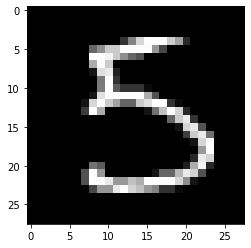

In [31]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[15]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Predection: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()


## Conclusion

Handwritten digit recognition is a classic machine learning problem with applications in various fields. The CNN model demonstrates effective digit recognition from the MNIST dataset, showcasing the power of deep learning techniques.